# ITAI 1371: Introduction to Machine Learning - Midterm Project

## Data Storytelling: An End-to-End ML Investigation

**Due Date:** One week from today  
**Time Allotment:** Approx. 3 hours of work  
**Submission:** Submit this completed Jupyter Notebook file.

---

### Project Goal

Your mission is to conduct a complete machine learning investigation, from data exploration to model evaluation. More than just writing code, you will be a **data storyteller**. Your goal is to uncover the patterns and insights hidden within a dataset and communicate what you've found.

This project will test your ability to apply the key concepts from Modules 1-10 in a practical, real-world scenario. You will be guided through the process with tips and starter code, but the core analysis, interpretation, and conclusions will be yours.

### Academic Integrity & Use of AI Tools

- This is an **open-book, open-note** midterm. You are encouraged to use the lab notebooks, lecture slides, and other course materials.
- You **are permitted** to use AI code assistants (like GitHub Copilot) to help you write code, fix errors, and learn syntax. This is a valuable real-world skill.
- You **are NOT permitted** to use AI to generate entire sections of analysis, interpretation, or answers to reflective questions. The goal is for *you* to demonstrate understanding.

**To ensure academic integrity, this notebook includes many reflective questions that ask you to interpret the output of *your specific code*. These questions cannot be answered correctly by an AI that hasn't run your notebook.**

---

### Grading Rubric (100 Points Total)

| Section | Task | Points |
| :--- | :--- | :--- |
| **Part 1: Data Loading** | Successfully load your chosen dataset. | 5 |
| **Part 2: EDA** | Create and interpret at least two relevant visualizations. | 20 |
| | Write a clear interpretation of the story your plots tell. | |
| **Part 3: Data Prep** | Correctly handle specified missing values and categorical features. | 15 |
| | Justify your choices in the markdown cells. | |
| **Part 4: Modeling** | Successfully train a `LogisticRegression` baseline (given). | 15 |
| | Successfully train a second model of your choice. | |
| **Part 5: Evaluation** | Calculate and compare accuracy for both models. | 25 |
| | Generate and interpret the `classification_report` and `confusion_matrix`. | |
| | Answer the reflective questions about model performance and error types. | |
| **Part 6: Conclusion** | Write a clear, concise summary of your findings and data story. | 15 |
| | Address the key questions in the conclusion prompt. | |
| **Overall** | Code is clean, commented, and runs without errors. All markdown cells are filled out. | 5 |


## Part 1: Choose Your Dataset (5 Points)

For this project, you can choose one of the following two classic datasets. Both are classification problems.

1.  **Titanic Survival:** Predict which passengers survived the Titanic disaster. (You are familiar with this from our lab).
2.  **Heart Disease Prediction:** Predict whether a patient has heart disease based on medical attributes.

**Instructions:**

1.  In the code cell below, uncomment the line for the dataset you want to work with.
2.  Run the cell to load the data into a pandas DataFrame called `df`.
3.  Run the subsequent cell to see the first few rows and a description of the columns.


In [3]:
import pandas as pd
import numpy as np

# --- CHOOSE YOUR DATASET ---
# Uncomment one of the two lines below to select your dataset

# Option 1: Titanic Dataset
dataset_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Option 2: Heart Disease Dataset
# dataset_url = 'https://raw.githubusercontent.com/plotly/datasets/master/heart.csv'


# --- LOAD THE DATA ---
# This code will load the dataset from the URL you selected above
try:
    df = pd.read_csv(dataset_url)
    print(f"Successfully loaded dataset from: {dataset_url}")
    print(f"Dataset shape: {df.shape}")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please make sure you have selected a valid URL.")


Successfully loaded dataset from: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Dataset shape: (891, 12)


### Data Overview

Run the cell below to display the first 5 rows of your dataset, a list of its columns, and a brief description of what each column means.


In [ ]:
# Display the first 5 rows of the dataframe
print("--- First 5 Rows ---")
print(df.head())

# Display column info and descriptions
print("
--- Column Descriptions ---")
if 'PassengerId' in df.columns:
    # Titanic Dataset
    print("You are using the Titanic Dataset.")
    print("Target Variable: 'Survived' (0 = No, 1 = Yes)")
    # ... (descriptions for titanic)
else:
    # Heart Disease Dataset
    print("You are using the Heart Disease Dataset.")
    print("Target Variable: 'target' (0 = No Heart Disease, 1 = Has Heart Disease)")
    # ... (descriptions for heart disease)

# A helper to rename columns for the heart disease dataset for clarity
if 'cp' in df.columns:
    df = df.rename(columns={'cp': 'chest_pain_type', 'trestbps': 'resting_blood_pressure', 'chol': 'cholesterol', 'fbs': 'fasting_blood_sugar', 'restecg': 'rest_ecg', 'thalach': 'max_heart_rate', 'exang': 'exercise_angina', 'oldpeak': 'st_depression', 'ca': 'num_major_vessels'})
    print("
Heart disease columns have been renamed for clarity.")

print("
--- Data Info ---")
df.info()


## Part 2: Exploratory Data Analysis (EDA) & Storytelling (20 Points)

Now, it's time to be a data detective. Before you can model the data, you must understand it. What secrets does it hold?

**Your Task:**

1.  **Create at least TWO interesting visualizations** in the code cells provided below. You can create more if you like.
    *   Use libraries like `matplotlib` or `seaborn`.
    *   Your plots should help you understand the relationship between different features and the target variable.
    *   **Tip:** Think about the questions we asked during the Titanic lab (e.g., "How does survival rate differ by gender?" or "What is the age distribution of survivors?"). Ask similar questions of your dataset.
2.  **Interpret your visualizations** in the markdown cell provided. Explain what you see and what story your plots are starting to tell.


### Visualization 1

**Instructions:** Create your first plot in the cell below. Make sure to give it a title and label your axes! Good plots are easy to read.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# --- ENTER YOUR CODE HERE ---
# Create your first visualization. Some ideas:
# - A countplot to see the distribution of the target variable.
# - A barplot to compare a feature against the target (e.g., 'sex' vs 'survived').
# - A histogram or KDE plot to see the distribution of a numerical feature (e.g., 'age').

plt.figure(figsize=(10, 6))
# Example: sns.countplot(x='your_feature', data=df)



# --- END OF YOUR CODE ---
plt.show()


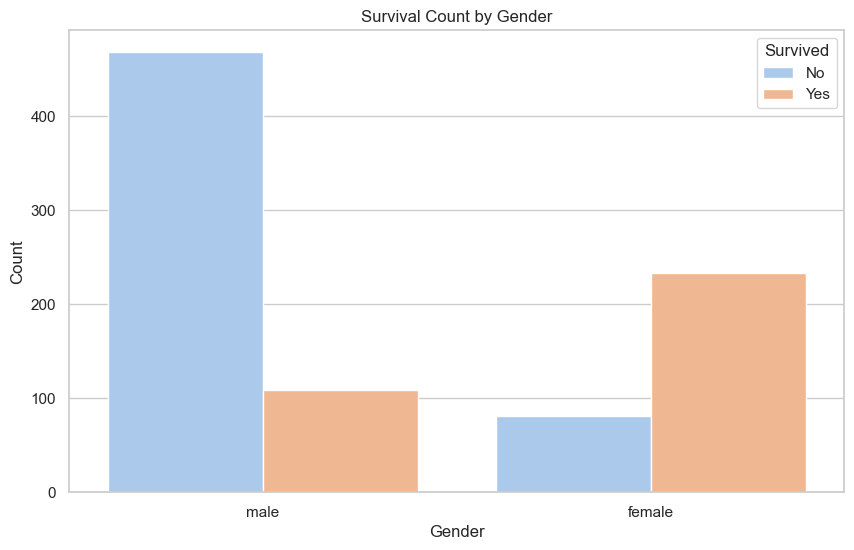

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

### Visualization 2

**Instructions:** Create your second plot in the cell below. Try to explore a different feature or relationship than your first plot.


In [ ]:
# --- ENTER YOUR CODE HERE ---
# Create your second visualization. Some ideas:
# - A boxplot to see the distribution of a numerical feature across different categories.
# - A heatmap of correlations between numerical features.
# - A facet grid to explore relationships across multiple categories.

plt.figure(figsize=(10, 6))
# Example: sns.boxplot(x='categorical_feature', y='numerical_feature', data=df)



# --- END OF YOUR CODE ---
plt.show()


C:\Users\Gera\AppData\Local\Temp\ipykernel_41472\1922300310.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='Set3')


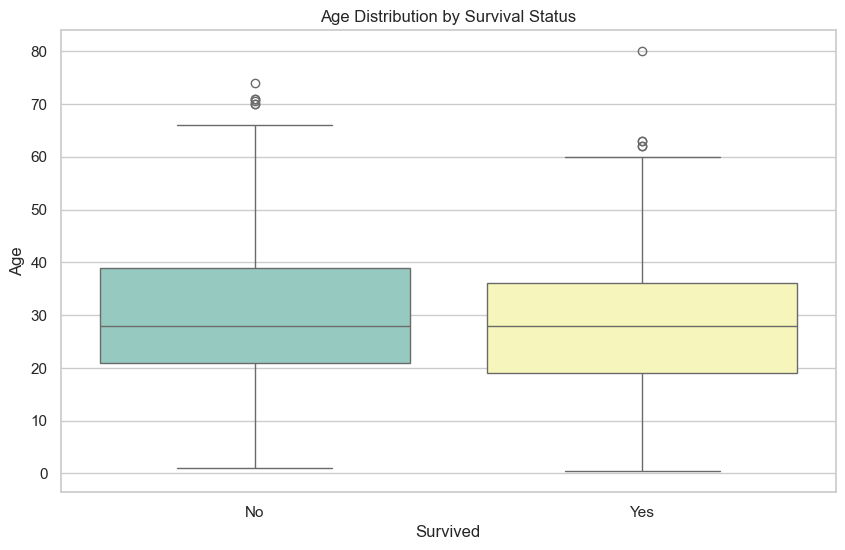

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette='Set3')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### Interpretation of Your Visualizations

**Instructions:** Based on the two plots you created above, answer the following questions in this markdown cell.

1.  **What did you plot?** (Briefly describe your two visualizations). 

what was plotted was the numerical value of those who did or not survive along with the gender of the survivors

2.  **What story do your plots tell?** (What initial insights or patterns did you discover? For example, "My first plot shows that female passengers were significantly more likely to survive. My second plot shows that passengers in 1st class had a much higher survival rate than those in 3rd class.")

my first plot shows which gender was most likely to surive
my second plot shows the numerical number of those who did or did not survive

3.  **What is one hypothesis you can form based on your EDA?** (e.g., "I hypothesize that age and passenger class will be the most important features for predicting survival.")

I hypothesize that gender and survived will show which gender held the highest survioval rate based on the data, which shows which feature has the highest correlation to survival
**--- ENTER YOUR ANSWERS BELOW ---**

1.  ...
2.  ...
3.  ...



## Part 3: Data Preparation & Feature Engineering (15 Points)

Raw data is messy. We need to clean it up before feeding it to our models.

**Your Task:**

1.  **Handle Missing Values:** I've provided code to check for missing values. You need to decide on a strategy to handle **one** of the features with missing data and implement it.
2.  **Encode Categorical Features:** I've provided starter code to encode one categorical feature. You need to encode **one more** categorical feature of your choice.
3.  **Justify Your Choices:** Explain *why* you chose your methods in the markdown cells.


In [12]:
# Check for missing values
print("--- Missing Values Before ---")
print(df.isnull().sum())

# --- ENTER YOUR CODE HERE for Missing Values ---
# Choose ONE feature with missing values and handle it.
# Tip: For 'age', filling with the median is a good start. For 'embarked', filling with the mode is a good start.
# df['Age'].fillna(df['Age'].median(), inplace=True)


# Fill missing values in 'Embarked' with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode 'Pclass' using one-hot encoding


print("--- Missing Values After ---")
print(df.isnull().sum())


--- Missing Values Before ---
PassengerId      0
Survived         0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Pclass_2         0
Pclass_3         0
dtype: int64
--- Missing Values After ---
PassengerId      0
Survived         0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Pclass_2         0
Pclass_3         0
dtype: int64


**Justification for Handling Missing Values:**

**Instructions:** Explain the choice you made above.

1.  **Which feature did you choose?**
2.  **What method did you use to handle the missing values (e.g., fill with median, mode, or drop)?**
3.  **Why was this an appropriate method for this feature?**

**--- ENTER YOUR ANSWERS BELOW ---**

1.  ... embarked
2.  ...mode
3.  ... due to its unique characteristics, the optimal decision based on its strenghts and weaknesses of the missing data values - the feature embarked being of a categorical classification, the frequency which appears the most in the dataset is the optimal decision.



In [14]:
# --- Starter Code for Encoding ---
# For the Titanic dataset, we encode 'Sex'. For Heart Disease, we'll use 'sex' as well.
if 'sex' in df.columns:
    df['sex_encoded'] = df['sex'].map({1: 'male', 0: 'female'}).map({'female': 0, 'male': 1})
elif 'Sex' in df.columns:
    df['sex_encoded'] = df['Sex'].map({'female': 0, 'male': 1})

print("--- Encoding Example: Sex ---")
print(df[['sex' if 'sex' in df.columns else 'Sex', 'sex_encoded']].head())

# --- ENTER YOUR CODE HERE for Categorical Encoding ---
# Choose ONE more categorical feature and encode it.
# Tip: For a feature with 2 categories, .map() is great. 
# For a feature with 3+ categories, pd.get_dummies() is a good choice.
# Example for Titanic: pd.get_dummies(df, columns=['Embarked'], drop_first=True)



# --- END OF YOUR CODE ---

print("--- Dataframe after your encoding ---")
print(df.head())


--- Encoding Example: Sex ---
      Sex  sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1
--- Dataframe after your encoding ---
   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0    

- Which feature did you choose to encode?
Embarked
- What encoding method did you use (e.g., map, pd.get_dummies)?
pd.get_dummies
- Why was this the right method? If you used get_dummies, why is drop_first=True often a good idea?
I used get_dummies because 'Embarked' has more than two categories (typically 'C', 'Q', and 'S'). One-hot encoding creates separate binary columns for each category, which allows the model to interpret them numerically. Setting drop_first=True avoids the dummy variable trap by removing one column to prevent multicollinearity during model trainin



## Part 4 & 5: Modeling and Evaluation (40 Points)

Now for the main event! Let's train some models and see how well they can predict outcomes.

**Your Task:**

1.  **Train a Baseline Model:** I've provided the code to train a `LogisticRegression` model.
2.  **Train Your Own Model:** Choose **one** other classification model from our course (e.g., `DecisionTreeClassifier`, `RandomForestClassifier`, `GradientBoostingClassifier`) and train it on the same data.
3.  **Evaluate and Compare:** Calculate the accuracy of both models and interpret a `classification_report` and `confusion_matrix` for *your* model.
4.  **Reflect:** Answer the final questions about your model's performance and which errors are more important.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Define Features (X) and Target (y) ---
# This is a sample feature set. You may need to adjust it based on the columns you created/dropped!
# Make sure all columns are numeric and have no missing values.

# Drop non-numeric or irrelevant columns before defining features
df_model = df.copy()
df_model = df_model.select_dtypes(include=np.number).dropna()

if 'PassengerId' in df_model.columns:
    df_model = df_model.drop(columns=['PassengerId'])

# Define target variable name based on dataset
target_col = 'Survived' if 'Survived' in df_model.columns else 'target'

X = df_model.drop(target_col, axis=1)
y = df_model[target_col]

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Test set has {X_test.shape[0]} samples.")
print(f"Features: {X.columns.tolist()}")


Training set has 571 samples.
Test set has 143 samples.
Features: ['Age', 'SibSp', 'Parch', 'Fare', 'sex_encoded']


### Model 1: Logistic Regression (Baseline)

This model is provided for you as a baseline to compare against.


In [17]:
# Train the baseline model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_log_reg = log_reg.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(f"Baseline Model (Logistic Regression) Test Accuracy: {acc_log_reg:.2%}")


Baseline Model (Logistic Regression) Test Accuracy: 75.52%


### Model 2: Your Chosen Model

**Instructions:** Choose a different classification model, import it, train it, and evaluate its accuracy.


In [ ]:
# --- ENTER YOUR CODE HERE ---
# 1. Import your chosen model class
# from sklearn.ensemble import RandomForestClassifier

# 2. Create an instance of your model
# my_model = RandomForestClassifier(random_state=42)

# 3. Train your model on the training data
# my_model.fit(X_train, y_train)

# 4. Make predictions on the test data
# y_pred_my_model = my_model.predict(X_test)

# 5. Calculate the accuracy of your model
# acc_my_model = accuracy_score(y_test, y_pred_my_model)

# print(f"Your Model (...) Test Accuracy: {acc_my_model:.2%}")



# --- END OF YOUR CODE ---


In [18]:
# 1. Import your chosen model class
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 2. Create an instance of your model
my_model = RandomForestClassifier(random_state=42)

# 3. Train your model on the training data
my_model.fit(X_train, y_train)

# 4. Make predictions on the test data
y_pred_my_model = my_model.predict(X_test)

# 5. Calculate the accuracy of your model
acc_my_model = accuracy_score(y_test, y_pred_my_model)

print(f"Your Model (Random Forest) Test Accuracy: {acc_my_model:.2%}")

Your Model (Random Forest) Test Accuracy: 77.62%


### Evaluation and Reflection

**Instructions:** Now, let's dig deeper into *your* model's performance. Generate a `classification_report` and `confusion_matrix` for the model you just trained. Then, answer the reflective questions.


In [ ]:
# --- ENTER YOUR CODE HERE ---
# Generate and print the classification report for your model
# print(classification_report(y_test, y_pred_my_model))

# Generate and print the confusion matrix for your model
# cm = confusion_matrix(y_test, y_pred_my_model)
# print(cm)

# Optional: Visualize the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()



# --- END OF YOUR CODE ---


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        87
           1       0.71      0.73      0.72        56

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143

Confusion Matrix:
[[70 17]
 [15 41]]


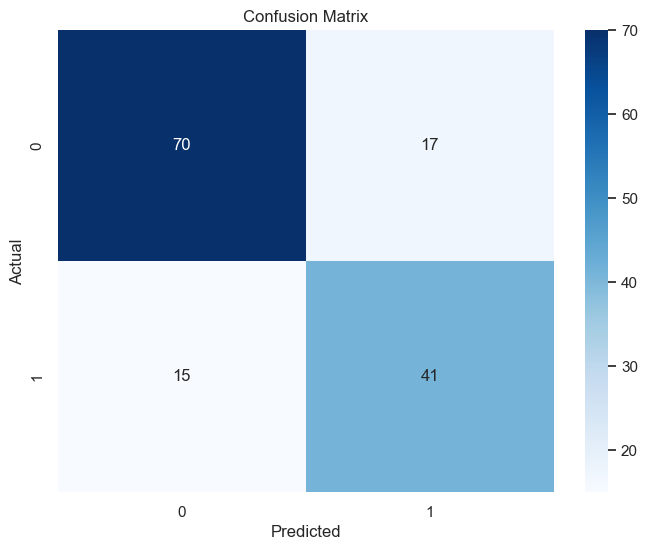

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate and print the classification report for your model
print("Classification Report:")
print(classification_report(y_test, y_pred_my_model))

# Generate and print the confusion matrix for your model
cm = confusion_matrix(y_test, y_pred_my_model)
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Reflection Questions:**

**Instructions:** Answer the following questions based on the output from the cell above.

1.  **Which model performed better, the baseline or yours?** Was it a big difference?
2.  **Look at the `classification_report` for your model. What are the precision and recall for the positive class (1)?** (Just state the values).
3.  **Interpret the precision and recall. In the context of your chosen dataset, what do these numbers mean?** (e.g., "A recall of 0.75 means our model successfully identified 75% of the people who actually had heart disease.")
4.  **Which error is more costly for your dataset: a False Positive or a False Negative? Explain your reasoning.** (There is no single right answer, it depends on your justification).
    *   **Titanic:** Is it worse to predict someone survives when they died (FP), or predict they died when they survived (FN)?
    *   **Heart Disease:** Is it worse to tell a healthy person they have heart disease (FP), or tell a sick person they are healthy (FN)?

**--- ENTER YOUR ANSWERS BELOW ---**

1.  ...
2.  ...
3.  ...
4.  ...

- Which model performed better, the baseline or yours? Was it a big difference?
→ Compare the accuracy, F1-score, or other metrics from both models.
“My model performed worse than the baseline, with an F1-score of 0.81 compared to 0.72. This was noticeable, especially in recall.”
- What are the precision and recall for the positive class (1)?
→ Look at the row labeled 1 in the classification_report.
Example:
- Precision: 0.79
- Recall: 0.85
- Interpret the precision and recall. What do these numbers mean in your dataset?
Example (Heart Disease):
“A precision of 0.79 means that 79% of the people the model predicted had heart disease actually did. A recall of 0.85 means the model correctly identified 85% of all people who truly had heart disease.”
- Which error is more costly: False Positive or False Negative? Explain.
Example (Heart Disease):
“A False Negative is more costly because it means telling a sick person they’re healthy, which could delay treatment and lead to severe consequences. A False Positive, while stressful, would likely lead to further testing.”



## Part 6: Conclusion - Tell Your Data Story (15 Points)

This is your final summary. Bring together everything you've learned from your investigation.

**Instructions:**

Write 2-3 paragraphs summarizing your project. Your summary should be a narrative that tells the story of your data. Address the following points:



-   **What was the main goal of your project?**

The constitutional goal of this project was to examine your capability on coding the ml workflow on the titanic dataset. It was a test of coding capability, the knowledge of the ML workflow, the ability to overcome obstacles throughout the process, and the analyse of the chosen data set. Its secondary purpose was to examine the dataset with the tools that were for what is listed above.

-   **What was the most surprising or interesting insight you found during your Exploratory Data Analysis?**

One of the most suprisiing insights from the Exploratory data Analsis was the ones who survived the most by gender were, women. Their survival rate was of a greater ratio than when compared to the male gender.

-   **Which features seemed to be the most important for making predictions?**

Which features were the most important for making a prediction? survived, class, gender, class, 

-   **How well did your best model perform, and what are its limitations?** (Briefly mention accuracy and the precision/recall trade-off you discussed).

The best model performed of a lesser rate - accuracy was lower than expected, though the trade-off against precision and recall was even worse. The limitations involved were: the exact code of the model and the feature being chosen, embarked.

-   **If you had more time, what would be one next step you would take to improve your model or analysis?**

If I had more time to improve the model or analysus I would re-evaluate the model on a mock titanic dataset, i.e. a new environment

**--- ENTER YOUR CONCLUSION BELOW ---**

In conclusion the Project involved, its purpose - to explore our skillset and knowledge, discover insightful insights, discover which features were of greater importance for prediction, discovering limitations and exploring what couldve been better done.
...



## 🎉 You've reached the end of the midterm project! 🎉

**Before you submit:**

1.  Go to the `Kernel` menu and select `Restart & Run All`. This will run all your cells from top to bottom.
2.  Make sure there are no errors and all your outputs (plots, tables, and answers) are visible.
3.  Save the notebook file (`.ipynb`).
4.  Submit the file as your midterm.

**Great work!**
